In [30]:
import pandas as pd
import pandera as pa
import numpy as np

In [31]:
xls_id = '1sbi5M9IsQ9ZArkpobJnAmkDsLzHPuSLEE8OeyxUbI5M'
xls_nome = 'atividade6'
url = f"https://docs.google.com/spreadsheets/d/{xls_id}/gviz/tq?tqx=out:csv&sheet={xls_nome}"

In [32]:
atividade6 = pd.read_csv(url, parse_dates=['Carimbo de data/hora'], dayfirst=True)
atividade6.tail()

,Carimbo de data/hora,Pontuação,Turma,Nome Completo do Estudante,Nº Chamada,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
7,2021-06-22 14:40:42,5 / 10,C,Pedro Henrique Lima,29.0,A,B,D,C
8,2021-06-18 09:32:04,0 / 10,C,Otavio Alves,28.0,B,D,A,C
9,2021-06-22 21:15:39,6 / 10,C,Rodrigo Vaz,33.0,C,B,C,B
10,2021-06-16 21:26:01,3 / 10,C,Samory Bokar Mabrouk,34.0,C,A,B,B
11,2021-01-07 21:00:08,6 / 10,C,Leonardo Novais,NaN,C,B,C,C


In [33]:
#rename colunas exercicios
atividade6.rename(columns={'Unnamed: 5': 'Exercício 1', 'Unnamed: 6': 'Exercício 2','Unnamed: 7': 'Exercício 3', 'Unnamed: 8': 'Exercício 4'}, inplace=True)

#teste .str - nome aluno upper sem espaços brancos
retira_espacos = atividade6['Nome Completo do Estudante'].str.upper().str.strip()
atividade6['Nome Completo do Estudante'] = retira_espacos
atividade6_formatado = atividade6

In [34]:
#xls2
xls_id2 = '1doi4rBHF8xl__IscIZbYdCotdzaqYrhXpl4-0ueiRAU'
xls_nome2 = 'diario8c'
url2 = f"https://docs.google.com/spreadsheets/d/{xls_id2}/gviz/tq?tqx=out:csv&sheet={xls_nome2}"

In [35]:
diario8c = pd.read_csv(url2)
diario8c.tail()

,Nº Chamada,Nome Completo do Estudante,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
31,32,REBECA MARIA DE MELO RIBEIRO,Transferido,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,33,RODRIGO VAZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,34,SAMORY BOKAR MABROUK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,35,TAMIRES DOS SANTOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,36,THALITA DA SILVA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#3ª col rename
diario8c.rename(columns = {'Unnamed: 2':'Situação'},inplace=True)

In [37]:
#filtra alunos transferidos
exclui_transferidos = diario8c['Situação'] != 'Transferido'
diario8c_formatado = diario8c.loc[exclui_transferidos,['Nº Chamada','Nome Completo do Estudante']]

In [38]:
diario8c_formatado.tail()

,Nº Chamada,Nome Completo do Estudante
30,31,RAIANE SILVA
32,33,RODRIGO VAZ
33,34,SAMORY BOKAR MABROUK
34,35,TAMIRES DOS SANTOS
35,36,THALITA DA SILVA


In [39]:
#busca número de chamada NaN no sheet atividade6 dentro do xls diario8c -> join on Nome Completo
atividade6_dadoscorretos = pd.merge(atividade6_formatado, diario8c_formatado,
how='inner', on='Nome Completo do Estudante')
atividade6_dadoscorretos.tail()


,Carimbo de data/hora,Pontuação,Turma,Nome Completo do Estudante,Nº Chamada_x,Exercício 1,Exercício 2,Exercício 3,Exercício 4,Nº Chamada_y
7,2021-06-22 14:40:42,5 / 10,C,PEDRO HENRIQUE LIMA,29.0,A,B,D,C,29
8,2021-06-18 09:32:04,0 / 10,C,OTAVIO ALVES,28.0,B,D,A,C,28
9,2021-06-22 21:15:39,6 / 10,C,RODRIGO VAZ,33.0,C,B,C,B,33
10,2021-06-16 21:26:01,3 / 10,C,SAMORY BOKAR MABROUK,34.0,C,A,B,B,34
11,2021-01-07 21:00:08,6 / 10,C,LEONARDO NOVAIS,NaN,C,B,C,C,20


In [40]:
#deleta coluna duplicada sem dado
atividade6_dadoscorretos.drop(['Nº Chamada_x'], axis=1, inplace=True)
atividade6_dadoscorretos.rename(columns={'Nº Chamada_y': 'Nº Chamada'},inplace=True)

In [41]:
#teste funções str/criação coluna email
nome = atividade6_dadoscorretos['Nome Completo do Estudante'].str.split(expand=True)
prefixo_email = nome[0].str.capitalize() + nome[1].str[0:2].str.upper() #só pra teste, merge já necessita estar igual
sufixo_email = '@mail.br'
email_completo = prefixo_email+sufixo_email
email_formatado = email_completo.str.lower()
atividade6_dadoscorretos['Email do Aluno'] = email_formatado

In [42]:
#teste drop column - Split  string " 5 / 10" em duas colunas: nota tirada e nota maxima

nota_e_total = atividade6_dadoscorretos['Pontuação'].str.split('/',expand=True)
atividade6_dadoscorretos['Nota Maxima'] = nota_e_total[1]
atividade6_dadoscorretos['Nota'] = nota_e_total[0]

In [43]:
# coverter as 2 novas em INT
atividade6_dadoscorretos['Nota'] = pd.to_numeric(atividade6_dadoscorretos['Nota'])
atividade6_dadoscorretos['Nota Maxima'] = pd.to_numeric(atividade6_dadoscorretos['Nota Maxima'])

In [44]:
#drop coluna original pontuação
atividade6_dadoscorretos.drop(['Pontuação'], axis=1, inplace=True)

In [45]:
atividade6_dadoscorretos

,Carimbo de data/hora,Turma,Nome Completo do Estudante,Exercício 1,Exercício 2,Exercício 3,Exercício 4,Nº Chamada,Email do Aluno,Nota Maxima,Nota
0,2021-06-23 14:16:13,C,DANIEL ORTIZ,A,B,D,A,5,danielor@mail.br,10,5
1,2021-06-16 11:00:23,C,EDUARDO OLIVEIRA BELASCO,B,D,B,C,7,eduardool@mail.br,10,0
2,2021-06-15 19:35:02,C,GILDERLAN DA SILVA,A,B,B,B,10,gilderlanda@mail.br,10,3
3,2021-06-25 14:04:35,C,JOICE LIMA,C,C,A,D,16,joiceli@mail.br,10,5
4,2021-06-24 12:43:25,C,KAIQUE SANTOS,C,D,D,D,17,kaiquesa@mail.br,10,7
5,2021-06-22 14:38:47,C,LUIZ FERNANDO DA SILVA,A,A,C,A,21,luizfe@mail.br,10,0
6,2021-06-15 13:36:43,C,MARIANA LUZIA GONCALVES,A,C,D,A,24,marianalu@mail.br,10,2
7,2021-06-22 14:40:42,C,PEDRO HENRIQUE LIMA,A,B,D,C,29,pedrohe@mail.br,10,5
8,2021-06-18 09:32:04,C,OTAVIO ALVES,B,D,A,C,28,otavioal@mail.br,10,0
9,2021-06-22 21:15:39,C,RODRIGO VAZ,C,B,C,B,33,rodrigova@mail.br,10,6


In [17]:
atividade6_dadoscorretos.dtypes

Carimbo de data/hora          datetime64[ns]
Turma                                 object
Nome Completo do Estudante            object
Exercício 1                           object
Exercício 2                           object
Exercício 3                           object
Exercício 4                           object
Nº Chamada                             int64
Email do Aluno                        object
Nota Maxima                            int64
Nota                                   int64
dtype: object

In [46]:
#teste pandera
schema = pa.DataFrameSchema(
    columns = {
        "Carimbo de data/hora":pa.Column(pa.DateTime),
        "Turma":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "Nome Completo do Estudante":pa.Column(pa.String, pa.Check.str_matches(r'^[^\s].+[^\s]$')), #se tem blanks começo ou final
        "Nº Chamada": pa.Column(pa.Int64,nullable=True),
        "Nota Maxima":pa.Column(pa.Int),
        "Exercício 1":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "Exercício 2":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "Exercício 3":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "Exercício 4":pa.Column(pa.String, pa.Check.str_length(1,1)),
        "Email do Aluno":pa.Column(pa.String),
        "Nota Maxima":pa.Column(pa.Int),
        "Nota":pa.Column(pa.Int)
        
        
    }
)


In [47]:
schema.validate(atividade6_dadoscorretos)

,Carimbo de data/hora,Turma,Nome Completo do Estudante,Exercício 1,Exercício 2,Exercício 3,Exercício 4,Nº Chamada,Email do Aluno,Nota Maxima,Nota
0,2021-06-23 14:16:13,C,DANIEL ORTIZ,A,B,D,A,5,danielor@mail.br,10,5
1,2021-06-16 11:00:23,C,EDUARDO OLIVEIRA BELASCO,B,D,B,C,7,eduardool@mail.br,10,0
2,2021-06-15 19:35:02,C,GILDERLAN DA SILVA,A,B,B,B,10,gilderlanda@mail.br,10,3
3,2021-06-25 14:04:35,C,JOICE LIMA,C,C,A,D,16,joiceli@mail.br,10,5
4,2021-06-24 12:43:25,C,KAIQUE SANTOS,C,D,D,D,17,kaiquesa@mail.br,10,7
5,2021-06-22 14:38:47,C,LUIZ FERNANDO DA SILVA,A,A,C,A,21,luizfe@mail.br,10,0
6,2021-06-15 13:36:43,C,MARIANA LUZIA GONCALVES,A,C,D,A,24,marianalu@mail.br,10,2
7,2021-06-22 14:40:42,C,PEDRO HENRIQUE LIMA,A,B,D,C,29,pedrohe@mail.br,10,5
8,2021-06-18 09:32:04,C,OTAVIO ALVES,B,D,A,C,28,otavioal@mail.br,10,0
9,2021-06-22 21:15:39,C,RODRIGO VAZ,C,B,C,B,33,rodrigova@mail.br,10,6


In [48]:
atividade6_dadoscorretos["Nota"].mean()

3.5

In [49]:
#ex teste apply com funções aleátorias
atividade6_dadoscorretos["Nota"].apply(lambda x: 
                                           np.sqrt( x + 
                                               np.sum(atividade6_dadoscorretos["Nota"]) + 
                                               atividade6_dadoscorretos["Nota"].sum()
                                           )
                                      ) 

0     9.433981
1     9.165151
2     9.327379
3     9.433981
4     9.539392
5     9.165151
6     9.273618
7     9.433981
8     9.165151
9     9.486833
10    9.327379
11    9.486833
Name: Nota, dtype: float64

In [50]:
#notas agrupadas por quantidade
ati6_notas_qtd = atividade6_dadoscorretos.groupby(['Nota'])
ati6_notas_qtd.size() 


Nota
0    3
2    1
3    2
5    3
6    2
7    1
dtype: int64

In [51]:
#info de alunos que tiraram a menor nata na atividade
nota_min = atividade6_dadoscorretos["Nota"].min()

ati6_notas_qtd.get_group(nota_min)

,Carimbo de data/hora,Turma,Nome Completo do Estudante,Exercício 1,Exercício 2,Exercício 3,Exercício 4,Nº Chamada,Email do Aluno,Nota Maxima,Nota
1,2021-06-16 11:00:23,C,EDUARDO OLIVEIRA BELASCO,B,D,B,C,7,eduardool@mail.br,10,0
5,2021-06-22 14:38:47,C,LUIZ FERNANDO DA SILVA,A,A,C,A,21,luizfe@mail.br,10,0
8,2021-06-18 09:32:04,C,OTAVIO ALVES,B,D,A,C,28,otavioal@mail.br,10,0


In [52]:
#apenas Nomes dos alunos que tiraram a maior nota na atividade
nota_max = atividade6_dadoscorretos["Nota"].max()

ati6_notas_qtd.get_group(nota_max)['Nome Completo do Estudante']

4    KAIQUE SANTOS
Name: Nome Completo do Estudante, dtype: object

In [25]:
#df só com as notas
respostas = atividade6_dadoscorretos.loc[:,['Exercício 1','Exercício 2','Exercício 3','Exercício 4']]
respostas

,Exercício 1,Exercício 2,Exercício 3,Exercício 4
0,A,B,D,A
1,B,D,B,C
2,A,B,B,B
3,C,C,A,D
4,C,D,D,D
5,A,A,C,A
6,A,C,D,A
7,A,B,D,C
8,B,D,A,C
9,C,B,C,B


In [26]:
#conta total alternativas por exercício
#ex1 = atividade6_dadoscorretos.groupby(['Exercício 1'])['Exercício 1'].count()
e1 = atividade6_dadoscorretos.groupby(['Exercício 1']).size()
e2 = atividade6_dadoscorretos.groupby(['Exercício 2']).size()
e3 = atividade6_dadoscorretos.groupby(['Exercício 3']).size()
e4 = atividade6_dadoscorretos.groupby(['Exercício 4']).size()

In [53]:
#tabela por respostas distintas e quantidade 
qnt_alternativas = pd.concat([e1,e2,e3,e4],axis=1)
qnt_alternativas

,0,1,2,3
A,5.0,2,2,3
B,2.0,5,3,3
C,5.0,2,3,4
D,NaN,3,4,2


In [54]:
#soma das alternativas respondidas na atividade
qnt_alternativas.agg('sum',axis=1).sort_values().astype('int')


D     9
A    12
B    13
C    14
dtype: int32

<AxesSubplot:>

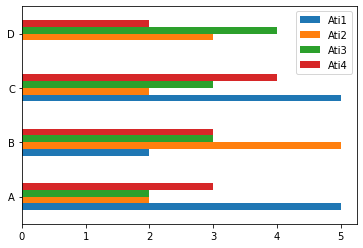

In [29]:
qnt_alternativas.rename(columns = {0:'Ati1',1:'Ati2',2:'Ati3',3:'Ati4'}, inplace=True)
qnt_alternativas.plot(kind='barh')
